# Wealth plots
Based on data from https://www.dst.dk/da/Statistik/emner/arbejde-og-indkomst/formue/formue-og-gaeld

In [44]:
import pandas as pd
from plotly_presentation import Plotter
from plotly_presentation._core.colors import Color
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [30]:
health_value_score = {
    "18-24": 100,
    "25-29": 100,
    "30-34": 98,
    "35-39": 95,
    "40-44": 90,
    "45-49": 84,
    "50-54": 75,
    "55-59": 65,
    "60-64": 51,
    "65-69": 38,
    "70-74": 24,
    "75-79": 12,
    "80-84": 7,
    "85-89": 4,
    "90+": 2,
}

health_df = pd.DataFrame(list(health_value_score.items()), columns=["Age Group", "Health Value Score"])
print(health_df)


   Age Group  Health Value Score
0      18-24                 100
1      25-29                 100
2      30-34                  98
3      35-39                  95
4      40-44                  90
5      45-49                  84
6      50-54                  75
7      55-59                  65
8      60-64                  51
9      65-69                  38
10     70-74                  24
11     75-79                  12
12     80-84                   7
13     85-89                   4
14       90+                   2


In [61]:
data = pd.read_csv("_data/DK wealth.csv")
# data["Health Score"] = data["Age group"].map(health_value_score)
data = data.melt(id_vars=["Age group", "Number of people d. 31.12"], value_vars=["Lower quartile", "Median", "Upper quartile"])
data["value"] /= 1e6 * 1.0
data.head()

,Age group,Number of people d. 31.12,variable,value
0,18-24,516344,Lower quartile,0.010946
1,25-29,409715,Lower quartile,0.003320
2,30-34,403882,Lower quartile,0.012252
3,35-39,357912,Lower quartile,0.065186
4,40-44,340314,Lower quartile,0.176309


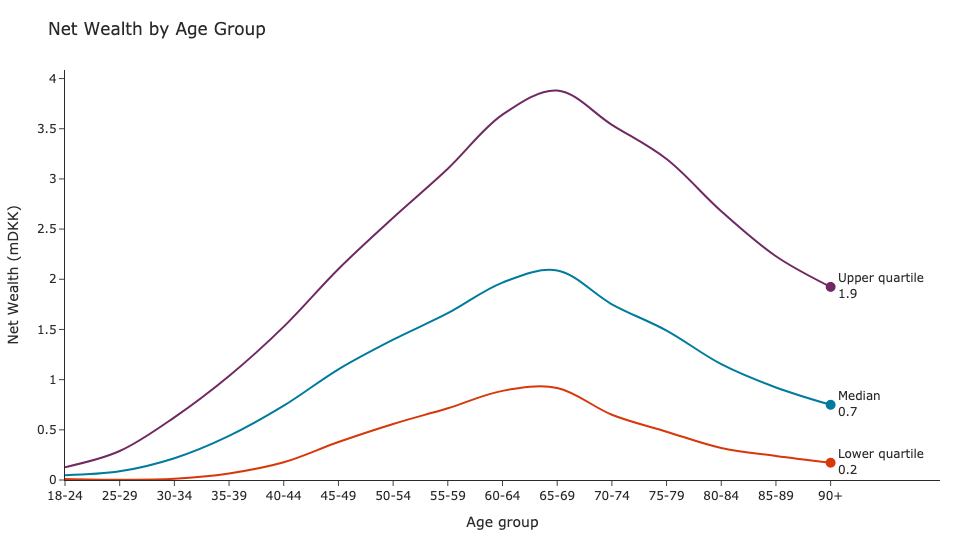

In [64]:
p = Plotter()
p.express(
    type="line",
    data_frame=data,
    x="Age group",
    y="value",
    color="variable",
    labels={
        "variable": "Wealth Group",
        "value": "Net Wealth (mDKK)"
    },
    line_shape="spline",
    title="Net Wealth by Age Group"
)
p.callout.add_line_end_marker(
    text_type="category+value",
    text_format=".1f"
)
p.figure.update_layout(
    xaxis=dict(range=[0, 16])
)
p.show()